In [7]:
# Built-in imports
import sys
from pathlib import Path

# External imports
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Local imports
from train import run_length_encoded_to_mask
from config import ROOT_DIR
from config import DEFECTS

In [9]:
if not ROOT_DIR.exists():
    sys.exit("Root dir doesn't exist, quitting.")

train = pd.read_csv(ROOT_DIR / 'train.csv')
train_images_dir = ROOT_DIR / 'train_images'

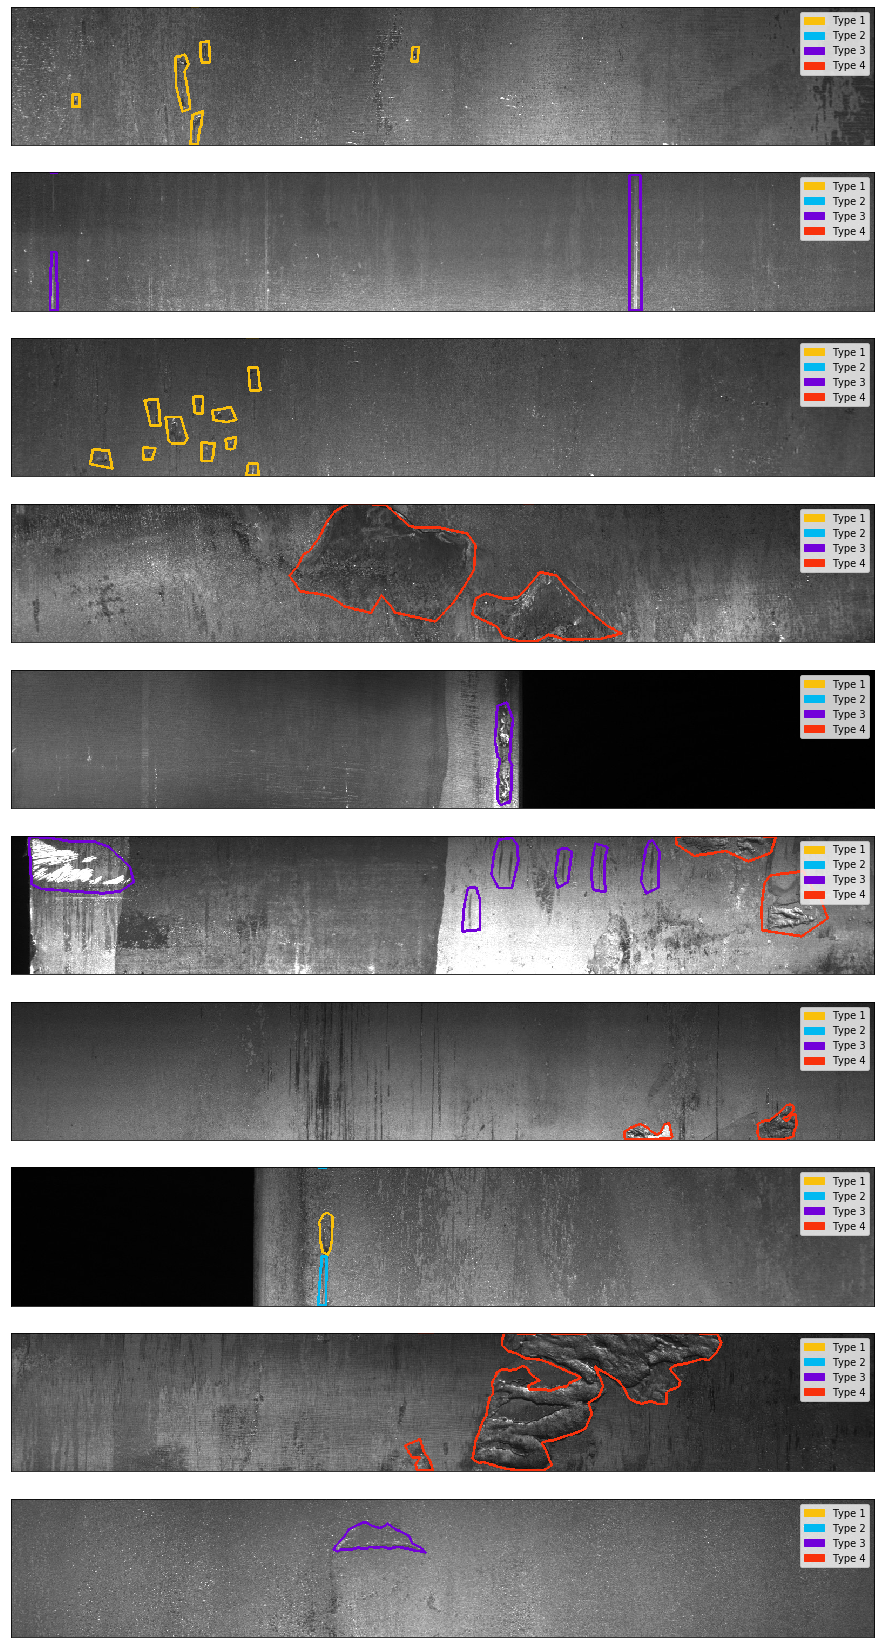

In [12]:
legend_elements = [
    Patch(
        facecolor = np.array(d['color']) / 255, 
        edgecolor = np.array(d['color']) / 255,
        label     = d['name']
    ) for d in DEFECTS ]

NUM_SAMPLES = 10
groups = list(train.groupby('ImageId'))[:NUM_SAMPLES]

fig,axs = plt.subplots(NUM_SAMPLES, 1, figsize=(30,30))
for i, (im_name,group) in enumerate(groups):
    im_path = str(train_images_dir/im_name)
    im = cv2.imread(im_path)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    
    for _,row in group.iterrows():
        color = row['ClassId'] - 1
        mask = run_length_encoded_to_mask(row['EncodedPixels'], im.shape[0], im.shape[1])
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cv2.drawContours(im, contours, -1, DEFECTS[color]['color'], 3)
    
    axs[i].imshow(im)
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].legend(handles=legend_elements)